<a href="https://colab.research.google.com/github/vineelbhatti/NBA_Homestate_Analysis/blob/main/NBA_Homestate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import geopandas as gpd

import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

In [ ]:
data = {
    'State': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado'],
    'Latitude': [32.806671, 61.370716, 33.729759, 34.969704, 36.116203, 39.059811],
    'Longitude': [-86.791130, -152.404419, -111.431221, -92.373123, -119.681564, -105.311104],
    'Value': [5, 10, 15, 20, 25, 30]
}

states = pd.DataFrame(data)


In [ ]:
#Reading data csv files
nba_stats = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/2022-23_NBA_Player_Stats.csv', encoding = 'latin', sep=';')
#Reading homestate csv file
homestate = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/NBA Players by State.csv')
#Removing empty columns
homestate = homestate.loc[:, ~homestate.columns.str.contains('^Unnamed')]
#Drop unneeded columns
homestate.drop(homestate.columns.difference(['Player','City', 'State']), 1, inplace=True)
#Merge the two datasets
nba_stats = pd.merge(nba_stats, homestate, on='Player')

#Display first 10 rows of dataset
nba_stats.head(10)

<ipython-input-4-64421743bb9c>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  homestate.drop(homestate.columns.difference(['Player','City', 'State']), 1, inplace=True)


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,City,State
0,10,Kyle Anderson,PF,29,MIN,46,31,26.0,3.0,6.0,...,4.0,4.7,4.0,1.2,0.8,1.4,2.2,8.3,New York,New York
1,27,Harrison Barnes,PF,30,SAC,56,56,32.6,4.6,9.7,...,3.7,4.6,1.6,0.8,0.1,1.2,1.3,14.9,Ames,Iowa
2,30,Will Barton,SG,32,WAS,40,0,19.6,2.8,7.1,...,2.5,2.8,2.4,0.4,0.3,1.1,1.0,7.7,Baltimore,Maryland
3,35,Bradley Beal,SG,29,WAS,33,33,32.8,8.5,16.4,...,2.7,3.5,5.2,0.8,0.7,2.7,1.9,22.5,St. Louis,Missouri
4,36,Malik Beasley,SG,26,TOT,56,13,26.6,4.8,12.1,...,3.1,3.6,1.7,0.8,0.1,1.1,1.4,13.2,Atlanta,Georgia
5,36,Malik Beasley,SG,26,UTA,55,13,26.8,4.8,12.2,...,3.1,3.6,1.7,0.8,0.1,1.1,1.4,13.4,Atlanta,Georgia
6,36,Malik Beasley,SG,26,LAL,1,0,16.0,2.0,9.0,...,2.0,2.0,0.0,1.0,0.0,3.0,1.0,4.0,Atlanta,Georgia
7,39,Patrick Beverley,PG,34,LAL,45,45,26.9,2.2,5.4,...,2.6,3.1,2.6,0.9,0.6,0.9,2.8,6.4,Chicago,Illinois
8,49,Devin Booker,SG,26,PHO,31,31,34.0,9.5,20.2,...,3.8,4.6,5.5,0.9,0.4,2.5,2.8,26.6,Grand Rapids,Michigan
9,59,Malcolm Brogdon,PG,30,BOS,48,0,24.9,4.9,10.4,...,3.5,4.2,3.7,0.6,0.3,1.6,1.5,14.3,Atlanta,Georgia


In [ ]:
state_counts = {}
#Create a dictionary of each state and the number of NBA players born there
for state in nba_stats['State']:
    state_counts[state] = state_counts.get(state, 0) + 1
print(state_counts)

{'New York': 6, 'Iowa': 1, 'Maryland': 6, 'Missouri': 2, 'Georgia': 6, 'Illinois': 10, 'Michigan': 5, 'Texas': 7, 'Florida': 2, 'Arkansas': 4, 'Massachusetts': 4, 'North Carolina': 8, 'Ohio': 5, 'California': 22, 'DC': 1, 'Virginia': 3, 'Indiana': 5, 'Oregon': 3, 'Alabama': 1, 'Oklahoma': 2, 'Washingon': 3, 'Wyoming': 1, 'Louisiana': 3, 'Minnesota': 4, 'Wisconsin': 1, 'Pennsylvania': 4, 'North Dakota': 1, 'South Carolina': 1, 'Tennessee': 1, 'Kentucky': 3, 'New Jersey': 1}


In [ ]:
states = list(state_counts.keys())
counts = list(state_counts.values())

In [ ]:
us_states = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
us_states['NBA_Players'] = us_states['iso_a3'].map(state_counts)

<ipython-input-21-0cc91051559b>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  us_states = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Figure size 1200x800 with 0 Axes>

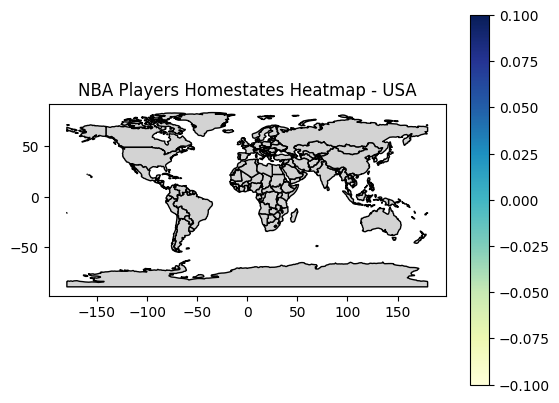

In [ ]:
plt.figure(figsize=(12, 8))
us_states.plot(column='NBA_Players', cmap='YlGnBu', legend=True, missing_kwds={'color': 'lightgrey'}, edgecolor='black')
plt.title('NBA Players Homestates Heatmap - USA')
plt.show()